In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras

from keras.layers import Conv2D, Flatten, Dense, Activation, MaxPool2D, Dropout
from keras.models import Model
from keras.layers import UpSampling2D, Reshape, ZeroPadding2D, Input
from keras.utils import np_utils

In [66]:
# Loading the data

ds = pd.read_csv('../data/mnist_train.csv')
print(ds.shape)
data = ds.values[:10000]

(42000, 785)


In [67]:
X = data[:,1:]/255.0
y = np_utils.to_categorical(data[:,0])

print(X.shape, y.shape)

(10000, 784) (10000, 10)


In [68]:
split = int(0.8*X.shape[0])

X_train = X[:split].reshape((-1,28,28,1))
X_test = X[split:].reshape((-1,28,28,1))

print(X_train.shape, X_test.shape)

(8000, 28, 28, 1) (2000, 28, 28, 1)


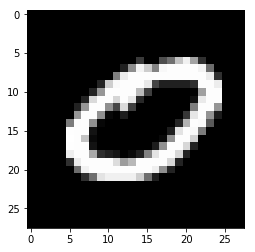

In [69]:
n_img = np.random.randint(low = 0, high = 100)

plt.imshow(X_train[n_img].reshape((28,28)), cmap='gray')
plt.show()

In [70]:
inp = Input(shape=(28,28,1))

c1 = Conv2D(32,(5,5))
a1 = Activation('relu')

m1 = MaxPool2D(pool_size=(2,2))

c2 = Conv2D(8, (3,3))
a2 = Activation('relu')

m2 = MaxPool2D(pool_size=(2,2))
f1 = Flatten()

emb_shape = 32

e1 = Dense(emb_shape)
emb = Activation('tanh')

fc1 = Dense(200)
a3 = Activation('sigmoid')

re1 = Reshape((5, 5, 8))

up1 = UpSampling2D(size=(2, 2))

zp1 = ZeroPadding2D(padding=(1, 1))
dc1 = Conv2D(32, (3, 3), padding='same', activation='relu')

up2 = UpSampling2D(size=(2, 2))

zp2 = ZeroPadding2D(padding=(2, 2))
dc2 = Conv2D(1, (5, 5), padding='same', activation='relu')


out_enc = emb(e1(f1(m2(a2(c2(m1(a1(c1(inp)))))))))
out_model = dc2(zp2(up2(dc1(zp1(up1(re1(a3(fc1(out_enc)))))))))


model = Model(inputs=[inp], outputs=[out_model])
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

encoder = Model(inputs=[inp], outputs=[out_enc])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
activation_17 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 8)         2312      
_________________________________________________________________
activation_18 (Activation)   (None, 10, 10, 8)         0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 8)           0         
__________

In [71]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
activation_17 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 8)         2312      
_________________________________________________________________
activation_18 (Activation)   (None, 10, 10, 8)         0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 8)           0         
__________

In [72]:
dec_inp = Input(shape=(emb_shape,))
dec_out = dc2(zp2(up2(dc1(zp1(up1(re1(a3(fc1(dec_inp)))))))))
decoder = Model(inputs=[dec_inp], outputs=[dec_out])
decoder.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               6600      
_________________________________________________________________
activation_20 (Activation)   (None, 200)               0         
_________________________________________________________________
reshape_5 (Reshape)          (None, 5, 5, 8)           0         
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 10, 10, 8)         0         
_________________________________________________________________
zero_padding2d_8 (ZeroPaddin (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 32)        2336      
__________

In [73]:
model.fit(X_train, X_train,
         epochs=10,
         shuffle=True,
         batch_size=100,
         validation_data=(X_test, X_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 294us/step - loss: 0.0567 - acc: 0.8027 - val_loss: 0.0402 - val_acc: 0.7937
Epoch 2/10
8000/8000 [==============================] - 1s 172us/step - loss: 0.0327 - acc: 0.8044 - val_loss: 0.0290 - val_acc: 0.8066
Epoch 3/10
8000/8000 [==============================] - 1s 174us/step - loss: 0.0258 - acc: 0.8076 - val_loss: 0.0237 - val_acc: 0.8068
Epoch 4/10
8000/8000 [==============================] - 1s 172us/step - loss: 0.0220 - acc: 0.8091 - val_loss: 0.0208 - val_acc: 0.8077
Epoch 5/10
8000/8000 [==============================] - 1s 170us/step - loss: 0.0196 - acc: 0.8100 - val_loss: 0.0191 - val_acc: 0.8090
Epoch 6/10
8000/8000 [==============================] - 1s 170us/step - loss: 0.0178 - acc: 0.8107 - val_loss: 0.0173 - val_acc: 0.8087
Epoch 7/10
8000/8000 [==============================] - 1s 168us/step - loss: 0.0166 - acc: 0.8111 - val_loss: 0.0163 - val_acc: 0.8087


In [74]:
enc_out = encoder.predict(X_train[:100])
print (enc_out.shape)

(100, 32)


In [75]:
rnd_vec = np.random.uniform(low=-1, high=1, size=(20, emb_shape))
print (rnd_vec.shape)

(20, 32)


In [76]:
rec = decoder.predict(rnd_vec)
print(rec.shape)

(20, 28, 28, 1)


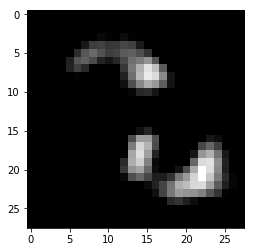

In [77]:
nx = 12

plt.figure(0)
#plt.imshow(X_train[nx].reshape((28, 28)), cmap='gray')

#plt.figure(1)
plt.imshow(rec[nx].reshape((28, 28)), cmap='gray')

plt.show()